<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [ ]:
os.listdir(base_path)

['data_add_delta_-4_n20.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n250.csv']

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.754190,27.436414,54.685939,1.892919e-06,127.876545,127.876543,1.595365e-06
1,0.0,1.0,46.117472,76.800236,82.464546,-2.985220e-08,215.382254,215.382254,3.690121e-08
2,0.0,2.0,75.179702,21.063180,40.695217,1.601672e-06,146.938101,146.938100,1.195132e-06
3,0.0,3.0,53.167871,56.211628,75.174876,1.382056e-08,194.554375,194.554375,-7.378620e-08
4,0.0,4.0,31.459343,56.851465,54.769872,9.340484e-08,153.080680,153.080680,-1.068639e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.171362,32.330253,93.831929,1.134356e-06,163.333546,163.333545,1.911691e-07
119996,999.0,116.0,70.870716,34.026158,48.795333,-8.006249e-08,163.692208,163.692208,-5.969911e-07
119997,999.0,117.0,60.579529,48.530202,59.830155,7.622699e-08,178.939885,178.939885,-3.194196e-07
119998,999.0,118.0,78.984322,74.547842,83.134692,7.460836e-09,246.666856,246.666856,-8.509991e-08


In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.754190,27.436414,54.685939,1.892919e-06,127.876545,127.876543,1.595365e-06
1,0.0,1.0,46.117472,76.800236,82.464546,-2.985220e-08,215.382254,215.382254,3.690121e-08
2,0.0,2.0,75.179702,21.063180,40.695217,1.601672e-06,146.938101,146.938100,1.195132e-06
3,0.0,3.0,53.167871,56.211628,75.174876,1.382056e-08,194.554375,194.554375,-7.378620e-08
4,0.0,4.0,31.459343,56.851465,54.769872,9.340484e-08,153.080680,153.080680,-1.068639e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.171362,32.330253,93.831929,1.134356e-06,163.333546,163.333545,1.911691e-07
119996,999.0,116.0,70.870716,34.026158,48.795333,-8.006249e-08,163.692208,163.692208,-5.969911e-07
119997,999.0,117.0,60.579529,48.530202,59.830155,7.622699e-08,178.939885,178.939885,-3.194196e-07
119998,999.0,118.0,78.984322,74.547842,83.134692,7.460836e-09,246.666856,246.666856,-8.509991e-08


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.754190,27.436414,54.685939,1.892919e-06,127.876545,127.876543,1.595365e-06
1,0.0,1.0,46.117472,76.800236,82.464546,-2.985220e-08,215.382254,215.382254,3.690121e-08
2,0.0,2.0,75.179702,21.063180,40.695217,1.601672e-06,146.938101,146.938100,1.195132e-06
3,0.0,3.0,53.167871,56.211628,75.174876,1.382056e-08,194.554375,194.554375,-7.378620e-08
4,0.0,4.0,31.459343,56.851465,54.769872,9.340484e-08,153.080680,153.080680,-1.068639e-08
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.171362,32.330253,93.831929,1.134356e-06,163.333546,163.333545,1.911691e-07
119996,999.0,116.0,70.870716,34.026158,48.795333,-8.006249e-08,163.692208,163.692208,-5.969911e-07
119997,999.0,117.0,60.579529,48.530202,59.830155,7.622699e-08,178.939885,178.939885,-3.194196e-07
119998,999.0,118.0,78.984322,74.547842,83.134692,7.460836e-09,246.666856,246.666856,-8.509991e-08


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    35.754190  27.436414  ...  127.876543  1.595365e-06
      1.0    46.117472  76.800236  ...  215.382254  3.690121e-08
      2.0    75.179702  21.063180  ...  146.938100  1.195132e-06
      3.0    53.167871  56.211628  ...  194.554375 -7.378620e-08
      4.0    31.459343  56.851465  ...  153.080680 -1.068639e-08
...                ...        ...  ...         ...           ...
999.0 115.0  27.171362  32.330253  ...  163.333545  1.911691e-07
      116.0  70.870716  34.026158  ...  163.692208 -5.969911e-07
      117.0  60.579529  48.530202  ...  178.939885 -3.194196e-07
      118.0  78.984322  74.547842  ...  246.666856 -8.509991e-08
      119.0  92.807532  64.463468  ...  227.088386 -4.874349e-08

[120000 rows x 7 columns]

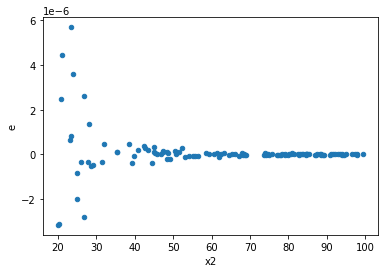

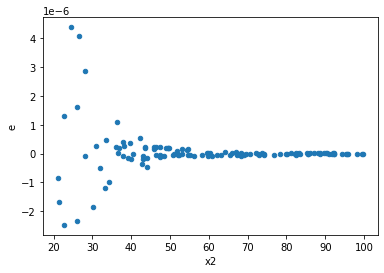

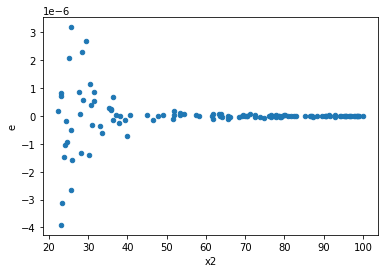

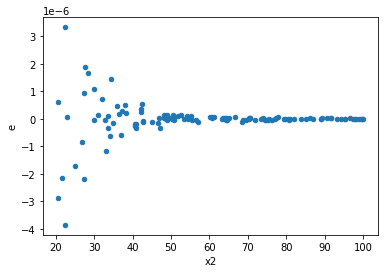

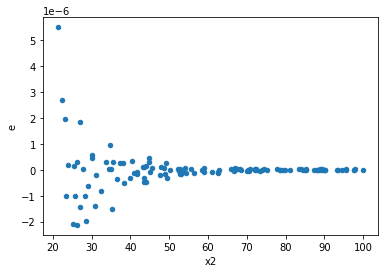

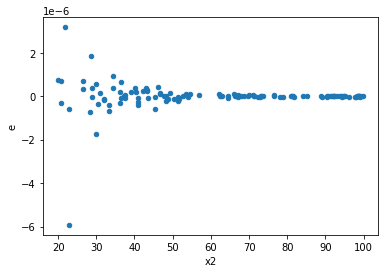

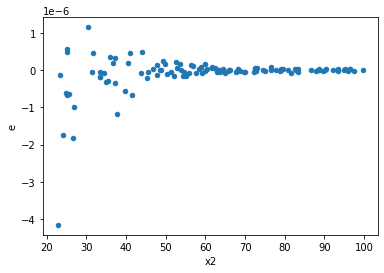

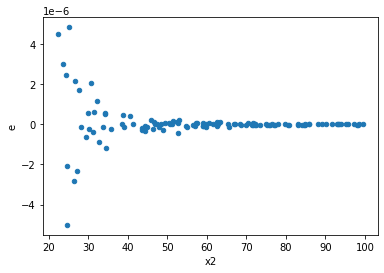

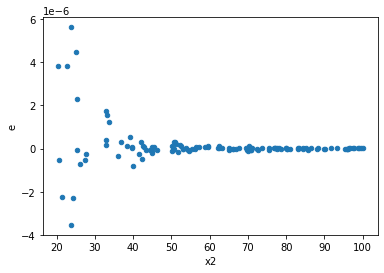

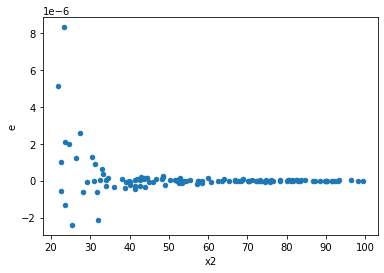

In [ ]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3.215102840554439e-14,7.347933248287454e-11,7.307051910350998e-16,1.6699848291562395e-12,0.00043755199345390985,1.0820644097998782e-63,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,1.5952193141871194e-14,7.613276069769052e-11,3.625498441334362e-16,1.7302900158566027e-12,0.00020953125823473657,6.973475634318441e-71,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1.8111435792830313e-14,7.846489744001911e-11,4.1162354074614347e-16,1.783293123636798e-12,0.00023082214319690192,6.147458091464123e-70,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.255806813246645e-14,6.946875512858404e-11,2.8541063937423754e-16,1.5788353438314556e-12,0.00018077289724311227,2.519930075255326e-72,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3.051272295547125e-14,1.416412570447275e-10,6.934709762607102e-16,3.2191194782892613e-12,0.00021542256537469118,1.3010454159543004e-70,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2.861214797566351e-14,4.264596445691079e-11,6.502760903559889e-16,9.692264649297906e-13,0.0006709227552954757,1.6101009810845084e-59,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1.4371098217652666e-14,6.005410921997506e-11,3.2661586858301513e-16,1.364866118635797e-12,0.00023930249577114004,1.3839057357079908e-69,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,2.6174568279450645e-14,8.74779575910289e-11,5.948765518056964e-16,1.9881353997961115e-12,0.0002992132989869315,2.1049570748762865e-67,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3.153403479138868e-14,5.63992812457014e-11,7.166826088951972e-16,1.2818018464932135e-12,0.0005591212174143108,2.6772962038534046e-61,Reject005=0 : Heteroscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64